# Data Analysis

<u><h4>1.Import useful modules

In [99]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

<u><h4>2.Load the data

In [101]:
# Import dataset
print("loading dataset...")
delay_data= pd.read_excel("/Users/nadiapreuvot/Desktop/deployment_project/get_around_delay_analysis.xlsx")
print("...done")
print()

loading dataset...
...done



In [3]:
# Display first 5 rows
print(delay_data.head())

   rental_id  car_id checkin_type     state  delay_at_checkout_in_minutes  \
0     505000  363965       mobile  canceled                           NaN   
1     507750  269550       mobile     ended                         -81.0   
2     508131  359049      connect     ended                          70.0   
3     508865  299063      connect  canceled                           NaN   
4     511440  313932       mobile     ended                           NaN   

   previous_ended_rental_id  time_delta_with_previous_rental_in_minutes  
0                       NaN                                         NaN  
1                       NaN                                         NaN  
2                       NaN                                         NaN  
3                       NaN                                         NaN  
4                       NaN                                         NaN  


In [4]:
#Basics stats
print("Number of rows: {}".format(delay_data.shape[0]))
print("Number of columns: {}".format(delay_data.shape[1]))
print()

print ("Dsipaly of dataset: ")
display(delay_data.head())
print()
print()

print ("Basics statistics: ")
df_desc= delay_data.describe(include="all")
display(df_desc)
print()

print("Percentage of missing values: ")
display(100*delay_data.isnull().sum()/delay_data.shape[0])

Number of rows: 21310
Number of columns: 7

Dsipaly of dataset: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN




Basics statistics: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000



Percentage of missing values: 


rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  23.294228
previous_ended_rental_id                      91.360863
time_delta_with_previous_rental_in_minutes    91.360863
dtype: float64

</u><ins><center> <font color="bleu"><ins>Basic statistics summary</font> </center>
<li> <ins>Missing Values:</ins>
</br>The delay_at_checkout_in_minutes column has about 23.29% missing values, which could be attributed to cancellations where the checkout did not occur.
</br>The previous_ended_rental_id and time_delta_with_previous_rental_in_minutes columns have a very high rate of missing values (91.36%).</br> This suggests that the majority of rentals do not have a directly linked previous rental or that these data were not recorded.</br>
<br>
<li><ins>Descriptive Statistics:</ins>
</br>The check-out delays (delay_at_checkout_in_minutes) exhibit significant variability, with extreme values both positive and negative.</br>
 It would be useful to explore the distribution of these delays to better understand typical and atypical behaviors.

In [5]:
delay_data.dtypes

rental_id                                       int64
car_id                                          int64
checkin_type                                   object
state                                          object
delay_at_checkout_in_minutes                  float64
previous_ended_rental_id                      float64
time_delta_with_previous_rental_in_minutes    float64
dtype: object

In [ ]:
# Data Cleaning (replace NaN by 0 when checkout is ended)
mask = delay_data["state"] == "ended"
delay_data["delay_at_checkout_in_minutes"] = delay_data[mask]["delay_at_checkout_in_minutes"].fillna(0)

In [6]:
# Convert into categorical type
cols_to_convert = ["checkin_type", "state"]
delay_data[cols_to_convert] = delay_data[cols_to_convert].astype('category')

In [7]:
# Verification des valeurs uniques
print("Unique values in 'checkin_type':", delay_data['checkin_type'].unique())
print("Unique values in 'state':", delay_data['state'].unique())

Unique values in 'checkin_type': ['mobile', 'connect']
Categories (2, object): ['connect', 'mobile']
Unique values in 'state': ['canceled', 'ended']
Categories (2, object): ['canceled', 'ended']


In [8]:
# Groupement par 'checkin_type' et calcul des retards moyens
average_delays_by_checkin = delay_data.groupby('checkin_type', observed=True)['delay_at_checkout_in_minutes'].mean()
print(average_delays_by_checkin)

checkin_type
connect   -43.627278
mobile     86.858854
Name: delay_at_checkout_in_minutes, dtype: float64


 Categorisation des Retards

</u><ins><center> <font color="bleu"><ins>Observations:  Categorisation des Retards</font> </center>
</br>
The time slots will be defined in minutes, and here is how we will organize them:
- Early Returns : Less than 0 minutes (the vehicle is returned before the scheduled time).
- Very Minor : 0 to 15 minutes
- Minor : 15 to 60 minutes
- Moderate : 60 to 180 minutes
- Serious : 180 to 600 minutes
- Very Serious : 600 to 1440 minutes (24 hours)
- Extreme : More than 1440 minutes


In [33]:
# Define time slots and labels
bins = [-1000000, 0, 15, 60, 180, 600, 1440, 1000000]
labels = ['Early Returns', 'Very Minor', 'Minor', 'Moderate', 'Serious', 'Very Serious(10 to 24h)', 'Extreme(more than 24h)']

# Application des tranches au DataFrame et création de la nouvelle colonne
delay_data['delay category'] = pd.cut(delay_data['delay_at_checkout_in_minutes'], bins=bins, labels=labels)

# Vérification de la nouvelle colonne
print(delay_data[['delay_at_checkout_in_minutes', 'delay category']].head())

   delay_at_checkout_in_minutes delay category
1                         -81.0  Early Returns
2                          70.0       Moderate
4                           NaN            NaN
5                        -203.0  Early Returns
6                         -15.0  Early Returns


In [10]:
# Compter les occurrences dans chaque catégorie de retard
category_counts = delay_data['delay category'].value_counts().sort_index()
print(category_counts)

delay category
Early Returns    6942
Very Minor       1988
Minor            3030
Moderate         2630
Serious          1182
Very Serious      386
Extreme           188
Name: count, dtype: int64


How often are drivers late for the next check-in? How does it impact the next driver?

METTRE LES POURCENTAGES DES CHECKOUT DELAYS

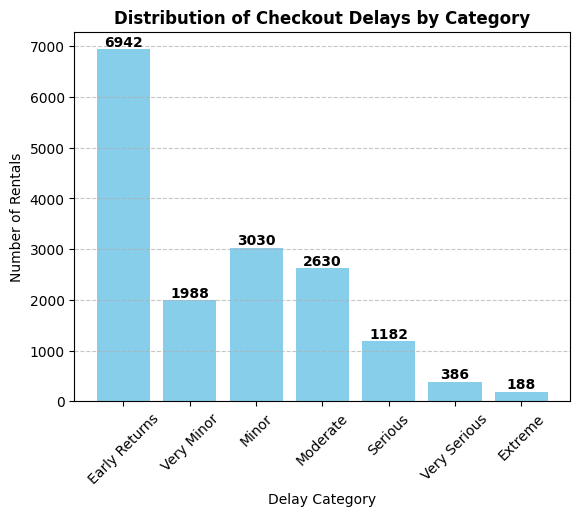

In [11]:
# Création d'un graphique en barres pour visualiser les comptages
fig, ax = plt.subplots()
bars = ax.bar(category_counts.index, category_counts.values, color='skyblue')

# Ajout de labels sur les barres
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontweight='bold')

# Mise en forme du graphique
plt.title('Distribution of Checkout Delays by Category', weight='bold')
plt.xlabel('Delay Category')
plt.ylabel('Number of Rentals')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [12]:
# Vérifier la répartition des valeurs manquantes par state 
missing_delays_by_state = delay_data[delay_data['delay_at_checkout_in_minutes'].isnull()]['state'].value_counts()
print(missing_delays_by_state)

state
canceled    3264
ended       1700
Name: count, dtype: int64


In [13]:
# Sauvegarde de l'état original de delay_data
original_data = delay_data.copy()

In [14]:
# Filtrer pour exclure les locations annulées et réassigner à delay_data
delay_data = delay_data[delay_data['state'] != 'canceled']

# Vérifier les dimensions du DataFrame pour s'assurer que les lignes ont été retirées
print("Nombre de lignes après exclusion des 'canceled':", delay_data.shape[0])

# Affichage des premières lignes du DataFrame mis à jour
display(delay_data.head())

Nombre de lignes après exclusion des 'canceled': 18045


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,delay category
1,507750,269550,mobile,ended,-81.0,NaN,NaN,Early Returns
2,508131,359049,connect,ended,70.0,NaN,NaN,Moderate
4,511440,313932,mobile,ended,NaN,NaN,NaN,NaN
5,511626,398802,mobile,ended,-203.0,NaN,NaN,Early Returns
6,511639,370585,connect,ended,-15.0,563782.0,570.0,Early Returns


In [15]:
print("Percentage of missing values in delay_at_checkout_in_minutes column: ")
display(100*delay_data['delay_at_checkout_in_minutes'].isnull().sum()/delay_data['delay_at_checkout_in_minutes'].shape[0])

Percentage of missing values in delay_at_checkout_in_minutes column: 


9.42089221390967

In [16]:
print("Summary stats for 'delay_at_checkout_in_minutes':", delay_data['delay_at_checkout_in_minutes'].describe())

Summary stats for 'delay_at_checkout_in_minutes': count    16345.000000
mean        60.773876
std        993.173222
min     -22433.000000
25%        -36.000000
50%          9.000000
75%         67.000000
max      71084.000000
Name: delay_at_checkout_in_minutes, dtype: float64


In [17]:
# Affichage des premières lignes du DataFrame mis à jour
display(delay_data.head())

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,delay category
1,507750,269550,mobile,ended,-81.0,NaN,NaN,Early Returns
2,508131,359049,connect,ended,70.0,NaN,NaN,Moderate
4,511440,313932,mobile,ended,NaN,NaN,NaN,NaN
5,511626,398802,mobile,ended,-203.0,NaN,NaN,Early Returns
6,511639,370585,connect,ended,-15.0,563782.0,570.0,Early Returns


 1.Analyse Exploratoire Approfondie

In [51]:
# Groupement des données par type de check-in et calcul des statistiques des retards
print("Summary stats for 'delay_at_checkout_in_minutes' by checkin type:")
print()
delay_by_checkin_type = delay_data.groupby('checkin_type', observed=True)['delay_at_checkout_in_minutes'].describe()
print(delay_by_checkin_type)

Summary stats for 'delay_at_checkout_in_minutes' by checkin type:

                count       mean          std      min    25%   50%   75%  \
checkin_type                                                                
connect        3402.0 -43.627278   228.681964  -4276.0 -75.75  -9.0  32.0   
mobile        12943.0  88.215174  1108.296230 -22433.0 -26.00  14.0  77.0   

                  max  
checkin_type           
connect        1466.0  
mobile        71084.0  


Delay Statistics by Check-in Type:
Connect: Delays recorded for the "Connect" type of check-in are generally negative, which indicates that cars are often returned earlier than expected. The average delay is -43.63 minutes, but there are also cases where the maximum delay reaches 1466 minutes.
Mobile: For the "Mobile" type of check-in, the average is positive at 88.22 minutes, indicating more frequent and significant delays. The extremely high maximum delay of 71,084 minutes suggests anomalies or exceptional cases that should be examined in more detail.

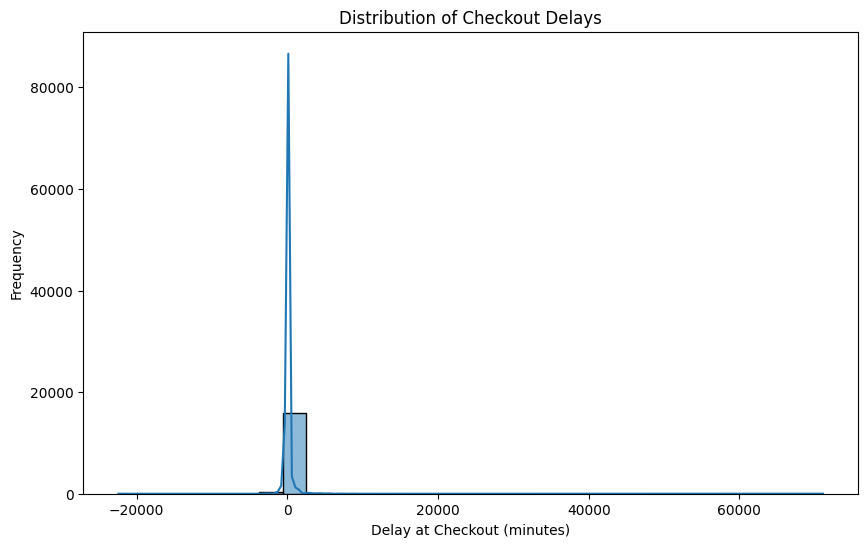

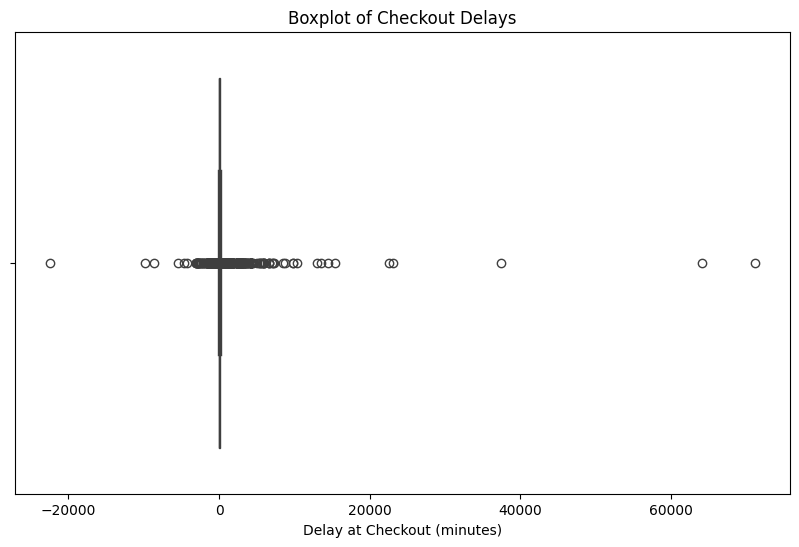

In [19]:
# Histogramme de la distribution des retards
plt.figure(figsize=(10, 6))
sns.histplot(data=delay_data, x='delay_at_checkout_in_minutes', bins=30, kde=True)
plt.title('Distribution of Checkout Delays')
plt.xlabel('Delay at Checkout (minutes)')
plt.ylabel('Frequency')
plt.show()

# Boxplot pour visualiser les valeurs aberrantes
plt.figure(figsize=(10, 6))
sns.boxplot(x=delay_data['delay_at_checkout_in_minutes'])
plt.title('Boxplot of Checkout Delays')
plt.xlabel('Delay at Checkout (minutes)')
plt.show()


Range of Delays: The graph shows a considerable range of delays, ranging from highly negative (returns well before the scheduled time) to extremely positive values (substantial delays).
Presence of Outliers: There are a significant number of outliers, especially for extremely long delays, which can extend to over 60,000 minutes. These values require further investigation to determine whether they are due to errors or represent exceptional but valid cases.

 Analyse des Retards par Type de Check-in

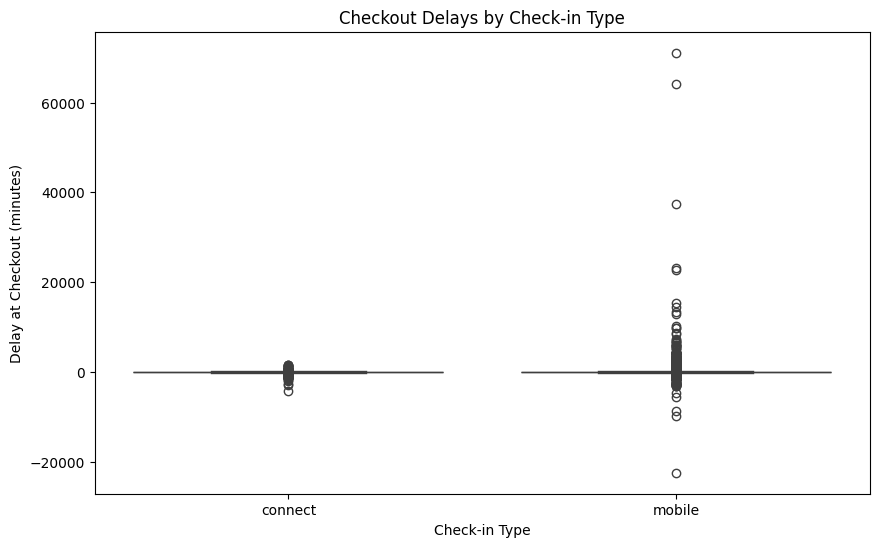

In [20]:
# Création d'un boxplot pour visualiser la distribution des retards par type de check-in
plt.figure(figsize=(10, 6))
sns.boxplot(x='checkin_type', y='delay_at_checkout_in_minutes', data=delay_data)
plt.title('Checkout Delays by Check-in Type')
plt.xlabel('Check-in Type')
plt.ylabel('Delay at Checkout (minutes)')
plt.show()

matrice de corrélation

Corrélation et Impact :

Analyse la corrélation entre le retard au check-out et le temps jusqu'à la prochaine location. Cela pourrait t'aider à comprendre si les retards ont tendance à affecter la disponibilité des voitures pour les locations suivantes.


2. Categorisation des Retards

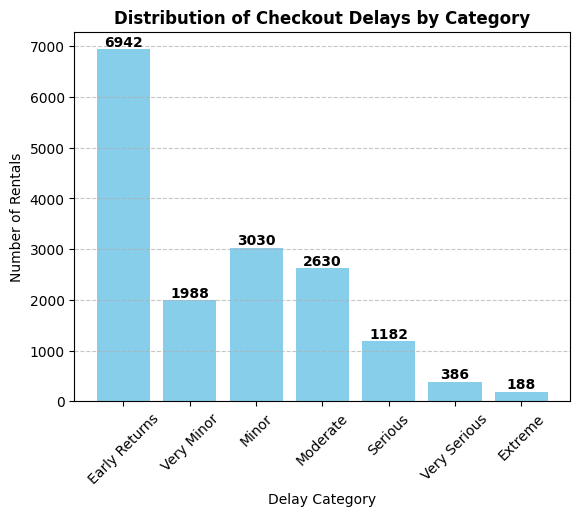

In [21]:
# Création d'un graphique en barres pour visualiser les comptages
fig, ax = plt.subplots()
bars = ax.bar(category_counts.index, category_counts.values, color='skyblue')

# Ajout de labels sur les barres
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontweight='bold', )

# Mise en forme du graphique
plt.title('Distribution of Checkout Delays by Category', weight='bold')
plt.xlabel('Delay Category')
plt.ylabel('Number of Rentals')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>

3. Analyse des Retards par Type de Check-in

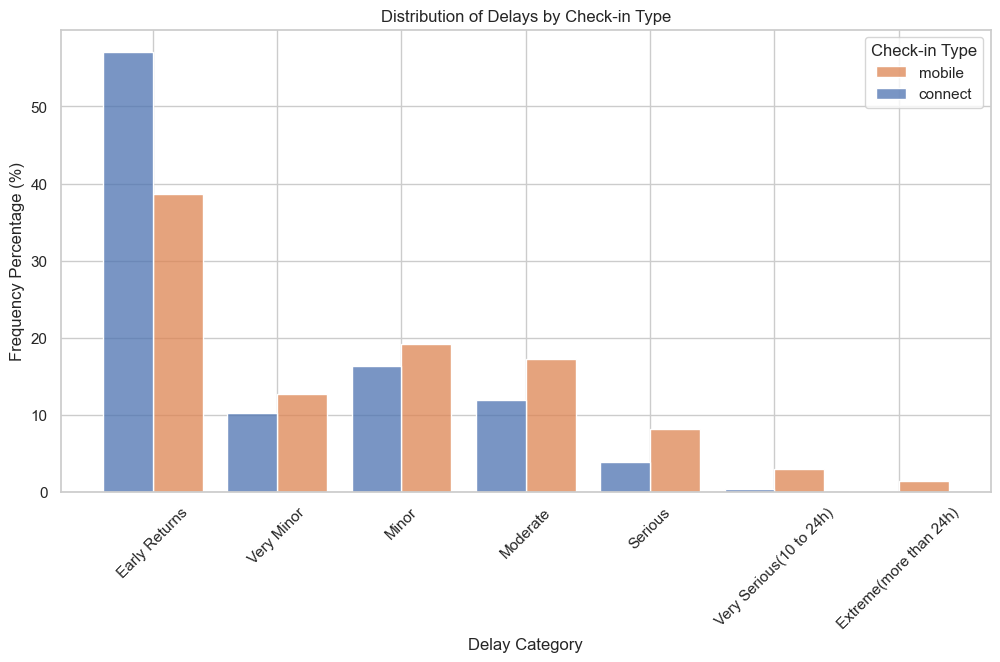

In [61]:
# Paramètres pour l'esthétique des plots
sns.set(style="whitegrid")

# Créer un histogramme pour chaque type de check-in
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=delay_data, x='delay category', hue='checkin_type', multiple='dodge', shrink=0.8, stat="percent", common_norm=False)

plt.title('Distribution of Delays by Check-in Type')
plt.xlabel('Delay Category')
plt.ylabel('Frequency Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Check-in Type', labels=delay_data['checkin_type'].unique())
plt.show()


preferable de cibler mobile que connect. mobile a plus de retard dans toutes les tranches et presente des retards dans very serious et extreme alors que connect n'en a pas dans ces deux categories.

</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>
1 <ins>Differences Between Check-in Types</ins>:
<li> <ins>Mobile:</ins> The mobile check-in type shows a higher frequency of delays across most categories, with a particularly high occurrence of "Early Returns". This might suggest that mobile check-ins often result in cars being returned before the scheduled time.
<li><ins>Connect:</ins> Delays for the "connect" type of check-in seem to be generally less frequent and less severe, but it also shows occurrences in categories such as "Moderate."</br>
</br>
2 <ins>Delay Categories</ins>:</br>
</br>
<li> "Early Returns" are notably more frequent with mobile check-ins, indicating that early returns are more common with this method, perhaps due to the flexibility or the informal nature of mobile processing.</br>
</br>
<li> "Very Minor" and "Minor" delays are also prominently higher for mobile check-ins, which could reflect operational challenges or less stringent time controls compared to connect check-ins.

In [31]:
#  'checkin_type'
checkin_type_counts = delay_data['checkin_type'].value_counts()
checkin_type_percentage = (checkin_type_counts / checkin_type_counts.sum()) * 100
print(checkin_type_percentage)
print(checkin_type_counts)

checkin_type
mobile     80.55417
connect    19.44583
Name: count, dtype: float64
checkin_type
mobile     14536
connect     3509
Name: count, dtype: int64


FAIRE APPARAITRE LES POURCENTAGES SUR LE GRAPHE

/var/folders/jw/qbrcjm2d74q5jys1_v4zld800000gn/T/ipykernel_63758/1739342853.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='checkin_type', data=delay_data, palette='Set2')


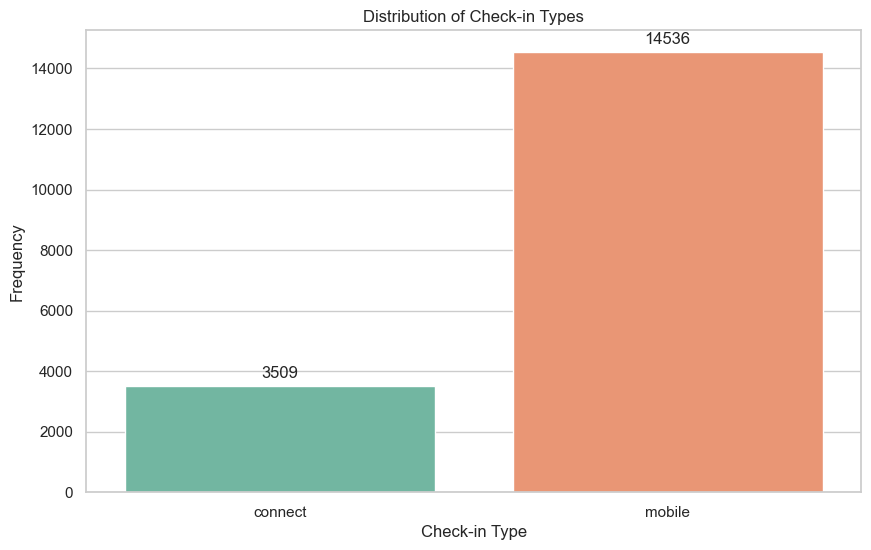

In [23]:
# Configuration de l'esthétique des graphiques
sns.set(style="whitegrid")

# Création d'un histogramme pour visualiser la distribution des types de check-in
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='checkin_type', data=delay_data, palette='Set2')

# Ajout de titres et labels
ax.set_title('Distribution of Check-in Types')
ax.set_xlabel('Check-in Type')
ax.set_ylabel('Frequency')

# Afficher les valeurs sur les barres
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()


The data shows a strong preference for "mobile" check-in, which requires direct interaction, possibly appreciated for the security or clarity it can provide during the rental process.
"Connect," offering more autonomy and flexibility, though less frequent, might attract a different segment of users who value convenience and speed.


Service Optimization:
For "mobile" check-in, consider optimizing the user experience on native apps, perhaps by improving the interface or reducing processing times.
For "Connect," evaluate the possibilities for enhancing the digital experience or expanding the service, given its potential to serve those who prefer a more technological and less personal approach.

1. Quelle part du revenu des propriétaires serait potentiellement affectée par la fonctionnalité ?

Pour répondre à cette question, nous devons d'abord comprendre combien de locations sont affectées par les retards, et ensuite estimer l'impact potentiel sur le revenu si ces locations étaient espacées pour éviter les chevauchements.

Analyse :

Calculer le pourcentage de toutes les locations qui ont un retard au check-out.
Estimer le revenu moyen par location et calculer la perte potentielle en bloquant l'inventaire pour un délai donné après chaque location retardée.

CAPPING

appliquer un capping à 2000 minutes semble être une décision prudente pour maintenir la cohérence et la fiabilité des analyses sans perdre d'informations cruciales. Si vous décidez de conserver le capping, il serait judicieux de continuer à surveiller la fréquence et l'impact des retards extrêmes pour ajuster cette limite si nécessaire.

In [89]:
# Appliquer le capping à 2000 minutes
delay_data['delay_at_checkout_in_minutes_capped'] = delay_data['delay_at_checkout_in_minutes'].clip(upper=2000)


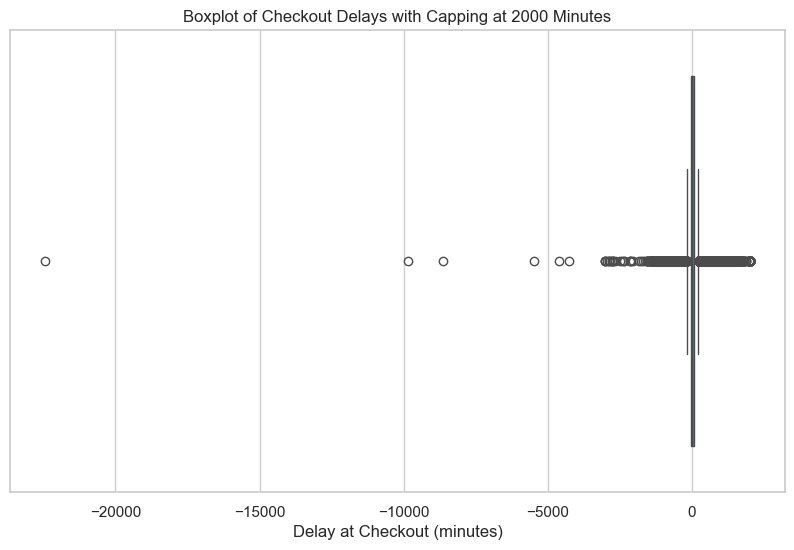

In [90]:
# Appliquer le capping à 2000 minutes
delay_data['delay_at_checkout_in_minutes_capped'] = delay_data['delay_at_checkout_in_minutes'].clip(upper=2000)

# Mise à jour des visualisations pour utiliser la nouvelle colonne capée
plt.figure(figsize=(10, 6))
sns.boxplot(x='delay_at_checkout_in_minutes_capped', data=delay_data)
plt.title('Boxplot of Checkout Delays with Capping at 2000 Minutes')
plt.xlabel('Delay at Checkout (minutes)')
plt.show()


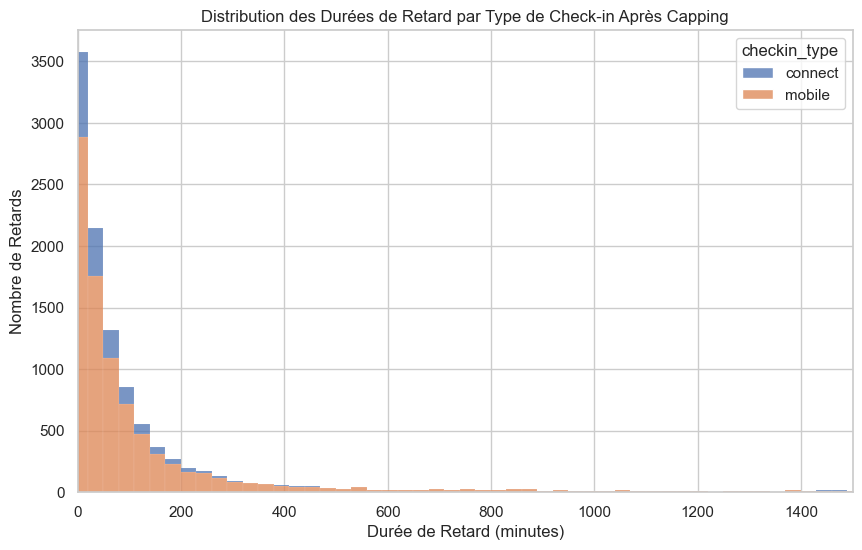

In [91]:
plt.figure(figsize=(10, 6))
sns.histplot(data=delay_data, x='delay_at_checkout_in_minutes_capped', hue='checkin_type', multiple='stack', binwidth=30)
plt.title('Distribution des Durées de Retard par Type de Check-in Après Capping')
plt.xlabel('Durée de Retard (minutes)')
plt.ylabel('Nombre de Retards')
plt.xlim(0, 1500)  # Limiter l'axe x pour une meilleure visibilité
plt.show()


In [24]:
pricing_data = pd.read_csv("/Users/nadiapreuvot/Desktop/deployment_project/get_around_pricing_project.csv")
display(pricing_data.head())

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [25]:
# calculer le pourcentage des locations avec retard
delay = delay_data[delay_data['delay_at_checkout_in_minutes'] > 0]
percent_delay = len(delay) / len(delay_data) * 100
print(f"Le pourcentage de locations avec retard est de {percent_delay}%")

# Calculer le nombre total de retards
total_delays = len(delay)
print(f"Nombre total de locations avec retard (plus de 0 minute) : {total_delays}")

Le pourcentage de locations avec retard est de 52.11415904682738%
Nombre total de locations avec retard (plus de 0 minute) : 9404


In [92]:

# calculer le pourcentage des locations avec retard
delay = delay_data[delay_data['delay_at_checkout_in_minutes_capped'] > 0]
percent_delay = len(delay) / len(delay_data) * 100
print(f"Le pourcentage de locations avec retard est de {percent_delay}%")

# Calculer le nombre total de retards
total_delays = len(delay)
print(f"Nombre total de locations avec retard (plus de 0 minute) : {total_delays}")

Le pourcentage de locations avec retard est de 52.11415904682738%
Nombre total de locations avec retard (plus de 0 minute) : 9404


CALCULER LE POURCENTAGE DE LOCATIONS RENDU AVANT L'HEURE (JUSTE EN DESSOUS)

In [28]:
# Cas où les véhicules sont retournés en avance
retours_anticipes = delay_data[delay_data['delay_at_checkout_in_minutes'] < 0]
print(f"Nombre de retours anticipés (retours avant l'heure prévue) : {len(retours_anticipes)}")

Nombre de retours anticipés (retours avant l'heure prévue) : 6819


2. Combien de locations seraient affectées par la fonctionnalité selon le seuil et la portée choisis ?

Pour cette analyse, nous devons explorer l'impact de différents seuils de temps (par exemple, 30 minutes, 1 heure, 2 heures) et déterminer si la fonctionnalité doit être appliquée à tous les types de voitures ou uniquement aux voitures avec Connect.

Analyse :

Calculer le nombre de locations qui ont eu un retard au check-out supérieur à chaque seuil testé.
Séparer les analyses pour les voitures avec et sans Getaround Connect pour voir si le type de check-in influe sur les retards.

3. À quelle fréquence les conducteurs sont-ils en retard pour le prochain check-in ?

Calculer la fréquence des retards au check-out.
Évaluer l'impact des retards sur le check-in suivant, notamment en examinant combien de fois le retard a causé un problème pour le conducteur suivant.

Nous examinerons la fréquence des retards et leur impact sur les locations suivantes, en particulier lorsque le délai entre les locations est court.

Analyse :

Calculer la fréquence des retards au check-out.
Analyser l'impact des retards sur le check-in suivant, comme le temps d'attente supplémentaire pour le prochain conducteur.

In [38]:
# Average
average_delay = delay["delay_at_checkout_in_minutes"].mean()
print(f"La moyenne des retards positifs est de {average_delay} minutes.")
#Max
max_delay = delay["delay_at_checkout_in_minutes"].max()
print(f"Le retard le plus important est de {max_delay} minutes.")
#Min
min_delay= delay["delay_at_checkout_in_minutes"].min()
print(f"Le retard le plus faible est de {min_delay} minutes.")

La moyenne des retards positifs est de 201.79147171416417 minutes.
Le retard le plus important est de 71084.0 minutes.
Le retard le plus faible est de 1.0 minutes.


In [93]:

# Average
average_delay = delay['delay_at_checkout_in_minutes_capped'].mean()
print(f"La moyenne des retards positifs est de {average_delay} minutes.")
#Max
max_delay = delay['delay_at_checkout_in_minutes_capped'].max()
print(f"Le retard le plus important est de {max_delay} minutes.")
#Min
min_delay= delay['delay_at_checkout_in_minutes_capped'].min()
print(f"Le retard le plus faible est de {min_delay} minutes.")

La moyenne des retards positifs est de 154.74574649085494 minutes.
Le retard le plus important est de 2000.0 minutes.
Le retard le plus faible est de 1.0 minutes.


Avec capping à 2000 : 154.75 minutes
Cette réduction est substantielle et montre que les retards extrêmes (comme ceux au-delà de 2000 minutes) avaient un impact important sur la moyenne. Le capping rend cette moyenne plus représentative des retards "typiques".
Avec capping à 2000 : 154.75 minutes
Cette réduction est substantielle et montre que les retards extrêmes (comme ceux au-delà de 2000 minutes) avaient un impact important sur la moyenne. Le capping rend cette moyenne plus représentative des retards "typiques".
Le capping à 2000 minutes peut aider à obtenir des insights plus précis et actionnables. Par exemple, des stratégies pour réduire les retards peuvent se concentrer sur des ajustements qui ciblent les retards les plus fréquents jusqu'à 2000 minutes.

Réduire les outliers peut également conduire à une meilleure compréhension de ce que vivent réellement la plupart des clients, permettant d'améliorer la satisfaction client en ciblant des améliorations où elles sont le plus souvent nécessaires.

Vehicles are returned approximately 3 hours and 22 minutes after the scheduled time when delays occur

In [39]:
# Supposons que chaque retard de plus de 3 heures empêche une location supplémentaire le même jour
delayed_days = len(delay_data[delay_data['delay_at_checkout_in_minutes'] > 180])  # Plus de 3 heures
average_daily_rate = pricing_data['rental_price_per_day'].mean()

# Estimer le revenu total perdu
total_revenue_lost = delayed_days * average_daily_rate
print(f"Revenu total potentiellement perdu à cause des retards : {total_revenue_lost} euros")


Revenu total potentiellement perdu à cause des retards : 212852.7259962833 euros


In [94]:
# Supposons que chaque retard de plus de 3 heures (et moins de 2000 minutes, si cappé) empêche une location supplémentaire le même jour
delayed_days_capped = len(delay_data[(delay_data['delay_at_checkout_in_minutes_capped'] > 180) & (delay_data['delay_at_checkout_in_minutes_capped'] <= 2000)])
total_revenue_lost_capped = delayed_days_capped * average_daily_rate

print(f"Revenu total potentiellement perdu (avec capping) : {total_revenue_lost_capped} euros")


Revenu total potentiellement perdu (avec capping) : 212852.7259962833 euros


Stabilité du modèle : Le fait que le résultat ne change pas avec ou sans capping à 2000 minutes montre que votre modèle de perte de revenu est robuste. Cela indique que même si vous excluez les valeurs extrêmes, les estimations restent stables, ce qui est une bonne nouvelle pour la fiabilité des analyses.

Impact des retards fréquents : Comme les retards plus courts et plus fréquents ont un impact plus significatif sur le calcul du revenu perdu, cela justifie de se concentrer sur la gestion de ces retards pour améliorer l'efficacité opérationnelle.

Pertinence du capping : La décision de mettre en place un capping à 2000 minutes est justifiée si l'on veut éviter que quelques valeurs extrêmes faussent la perception générale des retards. Cependant, si ces extrêmes ne changent pas les résultats de manière significative, le capping peut être ajusté ou même omis selon le contexte spécifique et la fréquence de ces extrêmes.

 Segmentation par Type de Check-in
Nous allons calculer les statistiques de retard pour chaque type de check-in et voir s'il existe des différences notables qui pourraient influencer les politiques ou les opérations.

visualisation 

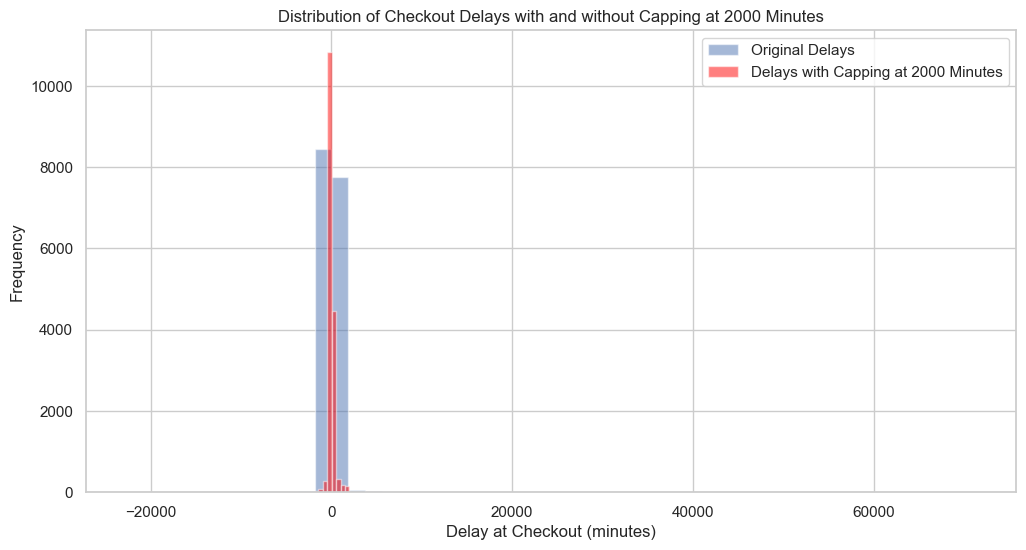

In [95]:
# Créer une nouvelle colonne pour les données avec capping
delay_data['delay_capped'] = delay_data['delay_at_checkout_in_minutes'].clip(upper=2000)

# Préparer les données pour l'histogramme
data_original = delay_data['delay_at_checkout_in_minutes'].dropna()
data_capped = delay_data['delay_capped'].dropna()

# Créer l'histogramme
plt.figure(figsize=(12, 6))
plt.hist(data_original, bins=50, alpha=0.5, label='Original Delays')
plt.hist(data_capped, bins=50, alpha=0.5, label='Delays with Capping at 2000 Minutes', color='red')
plt.title('Distribution of Checkout Delays with and without Capping at 2000 Minutes')
plt.xlabel('Delay at Checkout (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


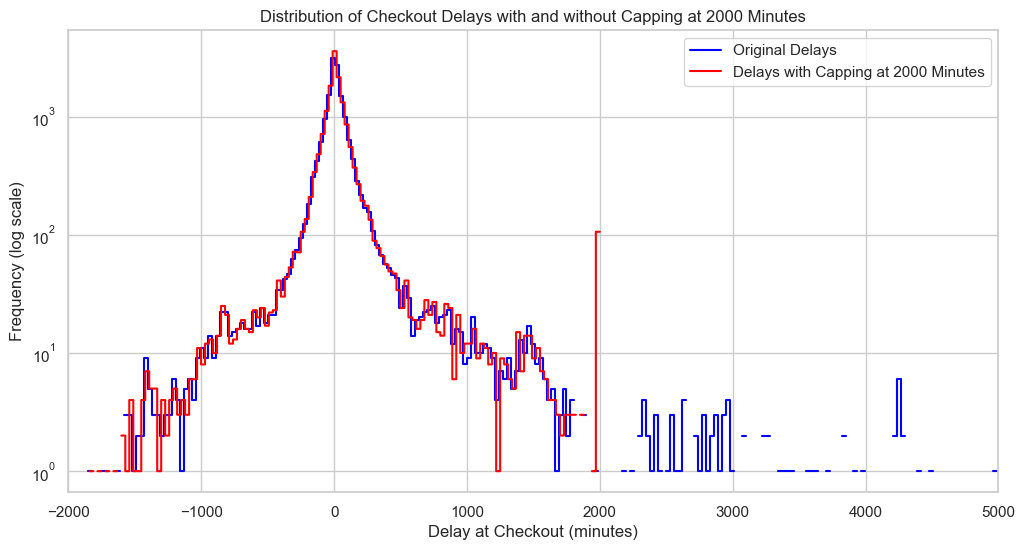

In [97]:
# Configuration de la visualisation
plt.figure(figsize=(12, 6))

# Création de l'histogramme pour les données de retards originales
sns.histplot(delay_data['delay_at_checkout_in_minutes'], color="blue", label='Original Delays', binwidth=30, log_scale=(False, True), element="step", fill=False)

# Création de l'histogramme pour les données avec capping à 2000 minutes
sns.histplot(delay_data['delay_at_checkout_in_minutes'].clip(upper=2000), color="red", label='Delays with Capping at 2000 Minutes', binwidth=30, log_scale=(False, True), element="step", fill=False)

# Ajout de titres et labels
plt.title('Distribution of Checkout Delays with and without Capping at 2000 Minutes')
plt.xlabel('Delay at Checkout (minutes)')
plt.ylabel('Frequency (log scale)')
plt.xlim(-2000, 5000)  # Ajustez selon les besoins pour focaliser sur une plage spécifique
plt.legend()

plt.show()


Cette visualisation illustre efficacement la distribution des retards à l'enregistrement, avec et sans application d'un plafonnement à 2000 minutes. Voici quelques observations clés :

Échelle logarithmique : L'utilisation de l'échelle logarithmique permet de mieux visualiser la distribution des retards, particulièrement là où les fréquences sont extrêmement variées.

Impact du plafonnement : Le plafonnement à 2000 minutes réduit les valeurs extrêmes, ce qui est visible par la ligne rouge qui s'arrête à 2000 minutes. Cela aide à minimiser l'effet des valeurs aberrantes sur la moyenne et autres statistiques descriptives, permettant une analyse plus représentative des retards typiques.

Distribution des retards : On observe une concentration élevée de retards juste au-dessus de zéro, indiquant que la plupart des retards sont de courte durée. Les retards extrêmement longs sont moins fréquents, mais ils existent, comme le montre la portée initiale avant le plafonnement.

Comparaison des distributions : La superposition des distributions montre comment le plafonnement modifie la portée des données. Les retards non plafonnés (en bleu) montrent quelques occurrences très éloignées sur l'axe des x, démontrant les retards extrêmes.

Conclusion :
Le plafonnement à 2000 minutes semble être une stratégie efficace pour gérer les valeurs aberrantes, en gardant l'analyse centrée sur les retards plus typiques et en réduisant l'impact des cas extrêmes. Cette méthode est particulièrement utile pour des analyses destinées à informer des décisions opérationnelles ou stratégiques, où comprendre le "normal" est plus utile que capturer chaque extrême.

In [54]:
# Calculer spécifiquement le nombre de retards de plus de 4 heures (240 minutes) par type de check-in
delays_over_4_hours = delay_by_checkin_type.apply(lambda x: (x > 240).sum())
print("\nNombre de retards de plus de 4 heures par type de check-in:")
print(delays_over_4_hours)


Nombre de retards de plus de 4 heures par type de check-in:
count    2
mean     0
std      1
min      0
25%      0
50%      0
75%      0
max      2
dtype: int64


# Groupement des données par type de check-in et calcul des statistiques des retards
print("Summary stats for 'delay_at_checkout_in_minutes' by checkin type:")
print()
delay_by_checkin_type = delay_data.groupby('checkin_type', observed=True)['delay_at_checkout_in_minutes'].describe()
print(delay_by_checkin_type)

Summary stats for 'delay_at_checkout_in_minutes' by checkin type:

                count       mean          std      min    25%   50%   75%  \
checkin_type                                                                
connect        3402.0 -43.627278   228.681964  -4276.0 -75.75  -9.0  32.0   
mobile        12943.0  88.215174  1108.296230 -22433.0 -26.00  14.0  77.0   

                  max  
checkin_type           
connect        1466.0  
mobile        71084.0  

In [55]:
# Calculer le nombre total de retards dépassant le seuil de 4 heures pour toute la base de données
total_delays_over_4_hours = len(delay_data[delay_data['delay_at_checkout_in_minutes'] > 240])
print(f"Nombre total de retards dépassant 4 heures : {total_delays_over_4_hours}")

# Pourcentage de ces retards par rapport au total des retards
percentage_over_4_hours = (total_delays_over_4_hours / len(delay_data[delay_data['delay_at_checkout_in_minutes'] > 0])) * 100
print(f"Pourcentage de retards dépassant 4 heures par rapport aux retards total : {percentage_over_4_hours:.2f}%")


Nombre total de retards dépassant 4 heures : 1334
Pourcentage de retards dépassant 4 heures par rapport aux retards total : 14.19%


In [56]:
# Calculer le nombre total de retards dépassant le seuil de 4 heures pour toute la base de données
total_delays_over_4_hours = len(delay_data[delay_data['delay_at_checkout_in_minutes'] > 240])
print(f"Nombre total de retards dépassant 4 heures : {total_delays_over_4_hours}")

# Recalcul du nombre de retards de plus de 4 heures par type de check-in
delays_over_4_hours_connect = delay_data[(delay_data['checkin_type'] == 'connect') & (delay_data['delay_at_checkout_in_minutes'] > 240)].shape[0]
delays_over_4_hours_mobile = delay_data[(delay_data['checkin_type'] == 'mobile') & (delay_data['delay_at_checkout_in_minutes'] > 240)].shape[0]

print(f"Nombre de retards de plus de 4 heures pour Connect: {delays_over_4_hours_connect}")
print(f"Nombre de retards de plus de 4 heures pour Mobile: {delays_over_4_hours_mobile}")

Nombre total de retards dépassant 4 heures : 1334
Nombre de retards de plus de 4 heures pour Connect: 87
Nombre de retards de plus de 4 heures pour Mobile: 1247


Delays by Check-in Type:
Connect (87 delays): Delays exceeding 4 hours are relatively less frequent with the "Connect" type of check-in. This could be due to the automated nature of this type of check-in, which can potentially minimize delays caused by human interactions.
Mobile (1247 delays): Delays with the "Mobile" type of check-in are significantly higher. This may indicate that check-in processes involving direct interaction are more prone to delays, possibly due to coordination among individuals, traffic issues, or other human factors.

In [67]:
# The current threshold is 4 hours, so 240 minutes
current_threshold = 240

# New threshold, 2 hours, soit 120 minutes
new_threshold = 180

# Filter delays for "Connect" that exceed the current threshold
delays_over_current_threshold = delay_data[
    (delay_data['checkin_type'] == 'mobile') & 
    (delay_data['delay_at_checkout_in_minutes'] > current_threshold)
]

# Filter delays for "Connect" that exceed the proposed new threshold
delays_over_new_threshold = delay_data[
    (delay_data['checkin_type'] == 'mobile') & 
    (delay_data['delay_at_checkout_in_minutes'] > new_threshold)
]

# Calculate the number of cases for each threshold
count_delays_over_current_threshold = delays_over_current_threshold.shape[0]
count_delays_over_new_threshold = delays_over_new_threshold.shape[0]

print(f"Nombre de retards de plus de {current_threshold} minutes pour 'Mobile': {count_delays_over_current_threshold}")
print(f"Nombre de retards de plus de {new_threshold} minutes pour 'Mobile': {count_delays_over_new_threshold}")

# Evaluate the impact of the threshold change
impact = ((count_delays_over_new_threshold - count_delays_over_current_threshold) / count_delays_over_current_threshold) * 100
print(f"Augmentation de {impact:.2f}% des retards dépassant le seuil initial en passant à un seuil de {new_threshold} minutes.")

Nombre de retards de plus de 240 minutes pour 'Mobile': 1247
Nombre de retards de plus de 180 minutes pour 'Mobile': 1609
Augmentation de 29.03% des retards dépassant le seuil initial en passant à un seuil de 180 minutes.


Implications de l'Augmentation du Nombre de Retards
Sensibilité aux Retards Plus Courts:

L'augmentation significative du nombre de retards capturés montre que beaucoup de retards se situent entre 180 et 240 minutes. Cela indique que ces retards, bien que plus courts que le seuil initial de 240 minutes, sont suffisamment fréquents pour être considérés dans l'analyse globale des retards.
Impact Potentiel sur les Opérations:

En incluant ces retards supplémentaires dans l'analyse, tu obtiens une image plus complète des perturbations potentielles causées par les retards dans les opérations de location. Cela peut aider à mieux comprendre à quel point ces retards intermédiaires affectent la disponibilité des véhicules et la planification des locations.
Gestion des Ressources:

Reconnaître et répondre à ces retards pourrait nécessiter un ajustement des ressources, telles que la planification du personnel pour les inspections et le nettoyage des véhicules, ou l'ajustement des horaires de location pour accommoder ces retards fréquents.
Évaluation des Seuils
Réévaluation des Politiques:
Ces données suggèrent que le seuil de 240 minutes pourrait être trop élevé pour capturer efficacement une gamme significative de retards qui ont un impact sur les opérations. Abaisser le seuil à 180 minutes pourrait permettre une gestion plus proactive et réactive des retards.
Optimisation de l'Expérience Client:
En ajustant le seuil, l'entreprise pourrait potentiellement réduire les inconvénients pour les clients causés par des retards non capturés auparavant. Cela pourrait améliorer la satisfaction client en diminuant les attentes imprévues et en améliorant la communication sur les retards.

changeons le threshold pour connect car les retards sont moindres

In [59]:
# The current threshold is 4 hours, so 240 minutes
current_threshold = 240

# New threshold, 2 hours, soit 120 minutes
new_threshold = 120

# Filter delays for "Connect" that exceed the current threshold
delays_over_current_threshold = delay_data[
    (delay_data['checkin_type'] == 'connect') & 
    (delay_data['delay_at_checkout_in_minutes'] > current_threshold)
]

# Filter delays for "Connect" that exceed the proposed new threshold
delays_over_new_threshold = delay_data[
    (delay_data['checkin_type'] == 'connect') & 
    (delay_data['delay_at_checkout_in_minutes'] > new_threshold)
]

# Calculate the number of cases for each threshold
count_delays_over_current_threshold = delays_over_current_threshold.shape[0]
count_delays_over_new_threshold = delays_over_new_threshold.shape[0]

print(f"Nombre de retards de plus de {current_threshold} minutes pour 'Connect': {count_delays_over_current_threshold}")
print(f"Nombre de retards de plus de {new_threshold} minutes pour 'Connect': {count_delays_over_new_threshold}")

# Evaluate the impact of the threshold change
impact = ((count_delays_over_new_threshold - count_delays_over_current_threshold) / count_delays_over_current_threshold) * 100
print(f"Augmentation de {impact:.2f}% des retards dépassant le seuil initial en passant à un seuil de {new_threshold} minutes.")


Nombre de retards de plus de 240 minutes pour 'Connect': 87
Nombre de retards de plus de 120 minutes pour 'Connect': 261
Augmentation de 200.00% des retards dépassant le seuil initial en passant à un seuil de 120 minutes.


"This information is crucial as it indicates that many more delays would be taken into account under the new policy, which could either improve vehicle management by allowing more responsive adjustments, or increase the number of cases where users are potentially penalized for minor delays."

In [60]:
# Filtrer les retards pour "Connect" qui dépassent le nouveau seuil de 180 minutes
delays_over_180_minutes_connect = delay_data[
    (delay_data['checkin_type'] == 'connect') & 
    (delay_data['delay_at_checkout_in_minutes'] > 180)
]

# Calculer le nombre de retards qui dépassent ce seuil
count_delays_over_180_minutes_connect = delays_over_180_minutes_connect.shape[0]

print(f"Nombre de retards de plus de 180 minutes pour 'Connect': {count_delays_over_180_minutes_connect}")


Nombre de retards de plus de 180 minutes pour 'Connect': 147


With 147 delays exceeding 180 minutes, compared to 87 delays for the 240-minute threshold, we see a significant increase in the number of delays captured. This shows that lowering the threshold from 240 to 180 minutes includes more delays but remains reasonable compared to an even lower threshold like 120 minutes, which captured 261 delays."

peut etre a mettre dans le dashboard en mettant des seuils differents

In [ ]:
# Suivi des retards dépassant le seuil ajusté après quelques mois
follow_up_delays = delay_data[
    (delay_data['checkin_type'] == 'connect') & 
    (delay_data['delay_at_checkout_in_minutes'] > 180)
]

# Réévaluer le nombre de retards
updated_count = follow_up_delays.shape[0]
print(f"Nombre mis à jour de retards de plus de 180 minutes pour 'Connect' après l'implémentation : {updated_count}")


analyse de sensibilité

In [40]:
thresholds = [120, 180, 240, 300]  # Divers seuils de retard en minutes
results = {} # initialiser dictionnaire
for threshold in thresholds:# Calculer le revenu perdu pour chaque seuil
    delayed_days = len(delay_data[delay_data['delay_at_checkout_in_minutes'] > threshold])# Compter le nombre de jours avec des retards dépassant le seuil
    total_revenue_lost = delayed_days * average_daily_rate # Calculer le revenu total perdu en multipliant les jours retardés par le taux journalier moyen
    results[threshold] = total_revenue_lost  # Stocker le résultat dans le dictionnaire

# Afficher les résultats
for threshold, revenue_lost in results.items(): # Afficher les résultats pour chaque seuil
    print(f"Seuil de {threshold} minutes: Revenu perdu estimé à {revenue_lost:.2f} euros")


Seuil de 120 minutes: Revenu perdu estimé à 309460.71 euros
Seuil de 180 minutes: Revenu perdu estimé à 212852.73 euros
Seuil de 240 minutes: Revenu perdu estimé à 161700.19 euros
Seuil de 300 minutes: Revenu perdu estimé à 127154.05 euros


Ces résultats te donnent une vision claire de l'impact économique des retards à différents seuils. Utilise ces informations pour :

Informer les décisions opérationnelles : Ajuster les politiques de retard en fonction de leur impact économique.
Optimiser les seuils de retard : Choisir un seuil qui minimise le revenu perdu tout en restant réaliste et équitable pour les utilisateurs.
Planification stratégique : Utiliser ces données pour planifier des améliorations dans les procédures de check-in et check-out, possiblement en renforçant les communications ou en ajustant les horaires pour mieux gérer les retards.


In [42]:
# Analyse de l'impact des retards
retards_impactants = delay_data[(delay_data['delay_at_checkout_in_minutes'] > 0) & (delay_data['time_delta_with_previous_rental_in_minutes'] < 60)]
impact_fréquence = len(retards_impactants) / len(delay) * 100
print(impact_fréquence)

2.0523181624840494


In [63]:
# Analyser l'impact des retards pour 'Connect'
retards_impactants_connect = delay_data[
    (delay_data['checkin_type'] == 'connect') & 
    (delay_data['delay_at_checkout_in_minutes'] > 0) & 
    (delay_data['time_delta_with_previous_rental_in_minutes'] < 60)
]
impact_frequence_connect = (len(retards_impactants_connect) / len(delay_data[delay_data['checkin_type'] == 'connect'])) * 100

# Analyser l'impact des retards pour 'Mobile'
retards_impactants_mobile = delay_data[
    (delay_data['checkin_type'] == 'mobile') & 
    (delay_data['delay_at_checkout_in_minutes'] > 0) & 
    (delay_data['time_delta_with_previous_rental_in_minutes'] < 60)
]
impact_frequence_mobile = (len(retards_impactants_mobile) / len(delay_data[delay_data['checkin_type'] == 'mobile'])) * 100

# Afficher les résultats
print(f"Impact des retards sur les check-ins 'Connect' : {impact_frequence_connect:.2f}%")
print(f"Impact des retards sur les check-ins 'Mobile' : {impact_frequence_mobile:.2f}%")


Impact des retards sur les check-ins 'Connect' : 2.02%
Impact des retards sur les check-ins 'Mobile' : 0.84%



Ces résultats offrent une vision précise de la fréquence à laquelle les retards dans les check-ins affectent directement la prochaine location pour les deux types de check-in chez Getaround, "Connect" et "Mobile". Voici une interprétation détaillée de ces chiffres :
Impact des Retards sur les Check-ins 'Connect' (2.02%):

Ce pourcentage indique que 2.02% des sessions de check-in de type "Connect" qui enregistrent un retard ont un impact direct sur la prochaine location programmée dans les 60 minutes suivantes.
Cela signifie que dans un peu plus de 2 cas sur 100, un retard avec "Connect" est susceptible de causer un problème logistique ou une contrainte pour le client suivant, probablement en raison de la fenêtre temporelle plus serrée entre les locations.
Impact des Retards sur les Check-ins 'Mobile' (0.84%):

Un pourcentage de 0.84% pour les check-ins "Mobile" montre que ces retards ont moins fréquemment un impact immédiat sur la location suivante comparé à "Connect".
Cela pourrait indiquer que les retards associés aux check-ins "Mobile" sont soit mieux gérés, soit qu'il existe une plus grande flexibilité ou un temps de tampon plus important entre les locations, réduisant ainsi la probabilité que les retards affectent les utilisateurs suivants.


In [66]:
# Analyser l'impact des retards pour 'Connect' avec un seuil de 120 minutes
retards_impactants_connect_120 = delay_data[
    (delay_data['checkin_type'] == 'connect') & 
    (delay_data['delay_at_checkout_in_minutes'] > 0) & 
    (delay_data['time_delta_with_previous_rental_in_minutes'] < 120)
]
impact_frequence_connect_120 = (len(retards_impactants_connect_120) / len(delay_data[delay_data['checkin_type'] == 'connect'])) * 100

# Analyser l'impact des retards pour 'Mobile' avec un seuil de 120 minutes
retards_impactants_mobile_120 = delay_data[
    (delay_data['checkin_type'] == 'mobile') & 
    (delay_data['delay_at_checkout_in_minutes'] > 0) & 
    (delay_data['time_delta_with_previous_rental_in_minutes'] < 120)
]
impact_frequence_mobile_120 = (len(retards_impactants_mobile_120) / len(delay_data[delay_data['checkin_type'] == 'mobile'])) * 100

# Afficher les résultats
print(f"Impact des retards sur les check-ins 'Connect' avec un seuil de 120 minutes : {impact_frequence_connect_120:.2f}%")
print(f"Impact des retards sur les check-ins 'Mobile' avec un seuil de 120 minutes : {impact_frequence_mobile_120:.2f}%")


Impact des retards sur les check-ins 'Connect' avec un seuil de 120 minutes : 3.16%
Impact des retards sur les check-ins 'Mobile' avec un seuil de 120 minutes : 1.37%


Ces augmentations indiquent que lorsque tu élargis la fenêtre d'impact de 60 à 120 minutes, tu captures plus de situations où les retards affectent la prochaine location. Cela suggère que de nombreux retards qui ne posent pas immédiatement problème dans les 60 minutes peuvent néanmoins devenir problématiques dans les deux heures suivantes.

In [64]:
# Analyser l'impact des retards supérieurs à 240 minutes
retards_impactants_240_connect = delay_data[
    (delay_data['checkin_type'] == 'connect') & 
    (delay_data['delay_at_checkout_in_minutes'] > 240) & 
    (delay_data['time_delta_with_previous_rental_in_minutes'] < 60)
]
impact_frequence_240_connect = (len(retards_impactants_240_connect) / len(delay_data[delay_data['checkin_type'] == 'connect'])) * 100

retards_impactants_240_mobile = delay_data[
    (delay_data['checkin_type'] == 'mobile') & 
    (delay_data['delay_at_checkout_in_minutes'] > 240) & 
    (delay_data['time_delta_with_previous_rental_in_minutes'] < 60)
]
impact_frequence_240_mobile = (len(retards_impactants_240_mobile) / len(delay_data[delay_data['checkin_type'] == 'mobile'])) * 100

# Afficher les résultats pour le seuil de 240 minutes
print(f"Impact des retards de plus de 240 minutes sur les check-ins 'Connect' : {impact_frequence_240_connect:.2f}%")
print(f"Impact des retards de plus de 240 minutes sur les check-ins 'Mobile' : {impact_frequence_240_mobile:.2f}%")


Impact des retards de plus de 240 minutes sur les check-ins 'Connect' : 0.14%
Impact des retards de plus de 240 minutes sur les check-ins 'Mobile' : 0.13%


Ce pourcentage est encore plus spécifique et montre que parmi tous les check-ins "Connect", seulement 0.14% des retards de plus de 240 minutes affectent directement la prochaine location. Cela suggère que les retards très longs (plus de 4 heures) sont encore moins susceptibles d'affecter immédiatement la prochaine location, probablement parce qu'ils sont assez rares

In [65]:
# Calculer le nombre total de retards dépassant 180 minutes pour "Connect"
total_delays_over_180_minutes_connect = len(delays_over_180_minutes_connect)

# Filtrer ces retards pour voir combien affectent directement la prochaine location dans moins de 60 minutes
impactful_delays_over_180_minutes_connect = delays_over_180_minutes_connect[
    delays_over_180_minutes_connect['time_delta_with_previous_rental_in_minutes'] < 60
]

# Calculer le nombre de retards impactants
total_impactful_delays_over_180_minutes_connect = len(impactful_delays_over_180_minutes_connect)

# Calculer le pourcentage de retards de plus de 180 minutes qui ont un impact direct
percentage_impact_over_180_minutes_connect = (total_impactful_delays_over_180_minutes_connect / total_delays_over_180_minutes_connect * 100) if total_delays_over_180_minutes_connect > 0 else 0

print(f"Total de retards 'Connect' de plus de 180 minutes : {total_delays_over_180_minutes_connect}")
print(f"Nombre de retards 'Connect' de plus de 180 minutes affectant directement la prochaine location : {total_impactful_delays_over_180_minutes_connect}")
print(f"Pourcentage de retards 'Connect' de plus de 180 minutes avec un impact direct : {percentage_impact_over_180_minutes_connect:.2f}%")

Total de retards 'Connect' de plus de 180 minutes : 147
Nombre de retards 'Connect' de plus de 180 minutes affectant directement la prochaine location : 7
Pourcentage de retards 'Connect' de plus de 180 minutes avec un impact direct : 4.76%


Le pourcentage de 4.76% indique que parmi tous les retards de plus de 180 minutes pour les check-ins "Connect", environ 4.76% d'entre eux affectent la prochaine location dans un délai très court, moins de 60 minutes. Cela signifie qu'il y a une probabilité relativement faible, mais existante, que ces retards puissent causer un impact direct et immédiat sur la prochaine location planifiée.

Dans ton analyse, le chiffre 7 représente le nombre de cas où un retard enregistré pour les check-ins "Connect" de plus de 180 minutes a directement affecté la prochaine location planifiée pour commencer dans les 60 minutes suivant le retard. Cela signifie que pour ces 7 instances, le retard a non seulement dépassé les 180 minutes, mais a aussi eu un impact direct et immédiat en ne laissant pas suffisamment de temps (moins de 60 minutes) pour la transition ou la préparation avant la prochaine réservation.

 Les 7 cas mentionnés représentent des situations où un retard prolongé de plus de 180 minutes pour les check-ins "Connect" a directement influencé la prochaine location prévue. Ces retards n'ont pas laissé suffisamment de temps (moins de 60 minutes) entre la fin du retard et le début de la prochaine location, ce qui a potentiellement causé des désagréments pour les clients suivants, comme des retards dans leur prise en charge ou des changements de dernière minute dans leurs plans.

Cela signifie que pour ces 7 instances, les opérations normales ont été perturbées au point d'affecter directement la prochaine réservation programmée, mettant en lumière des points critiques dans la gestion des retards et des transitions entre les locations.

In [68]:
# Filtrer les retards de plus de 240 minutes pour 'Mobile'
delays_over_240_minutes_mobile = delay_data[
    (delay_data['checkin_type'] == 'mobile') & 
    (delay_data['delay_at_checkout_in_minutes'] > 240)
]

# Calculer le nombre total de ces retards
total_delays_over_240_minutes_mobile = len(delays_over_240_minutes_mobile)

# Filtrer ces retards pour voir combien affectent directement la prochaine location dans moins de 60 minutes
impactful_delays_over_240_minutes_mobile = delays_over_240_minutes_mobile[
    delays_over_240_minutes_mobile['time_delta_with_previous_rental_in_minutes'] < 60
]

# Calculer le nombre de retards impactants
total_impactful_delays_over_240_minutes_mobile = len(impactful_delays_over_240_minutes_mobile)

# Calculer le pourcentage de retards de plus de 240 minutes qui ont un impact direct
percentage_impact_over_240_minutes_mobile = (total_impactful_delays_over_240_minutes_mobile / total_delays_over_240_minutes_mobile * 100) if total_delays_over_240_minutes_mobile > 0 else 0

print(f"Total de retards 'Mobile' de plus de 240 minutes : {total_delays_over_240_minutes_mobile}")
print(f"Nombre de retards 'Mobile' de plus de 240 minutes affectant directement la prochaine location : {total_impactful_delays_over_240_minutes_mobile}")
print(f"Pourcentage de retards 'Mobile' de plus de 240 minutes avec un impact direct : {percentage_impact_over_240_minutes_mobile:.2f}%")


Total de retards 'Mobile' de plus de 240 minutes : 1247
Nombre de retards 'Mobile' de plus de 240 minutes affectant directement la prochaine location : 19
Pourcentage de retards 'Mobile' de plus de 240 minutes avec un impact direct : 1.52%


4. Combien de cas problématiques la fonctionnalité résoudra-t-elle selon le seuil et la portée choisis ?

Enfin, nous évaluerons combien de conflits ou de problèmes (tels que des annulations ou des plaintes) pourraient être évités par l'introduction de cette fonctionnalité.

Analyse :

Évaluer le nombre de cas où le retard a causé un impact direct sur la prochaine location.
Calculer combien de ces problèmes auraient été évités sous différents seuils de délai.


Identifier les cas où le retard a eu un impact direct sur la location suivante.
Calculer le pourcentage de problèmes qui auraient été évités par différents seuils de délai.

In [69]:
# Pour 'Connect' avec un seuil de 180 minutes
retards_connect_180 = delay_data[
    (delay_data['checkin_type'] == 'connect') &
    (delay_data['delay_at_checkout_in_minutes'] > 180)
]

# Filtrer pour voir combien n'affectent pas directement la prochaine location dans moins de 30 minutes
cas_non_impactants_180_connect = retards_connect_180[
    retards_connect_180['time_delta_with_previous_rental_in_minutes'] >= 30
]
nombre_cas_non_impactants_180_connect = len(cas_non_impactants_180_connect)

# Pour 'Mobile' avec un seuil de 240 minutes
retards_mobile_240 = delay_data[
    (delay_data['checkin_type'] == 'mobile') &
    (delay_data['delay_at_checkout_in_minutes'] > 240)
]

# Filtrer pour voir combien n'affectent pas directement la prochaine location dans moins de 30 minutes
cas_non_impactants_240_mobile = retards_mobile_240[
    retards_mobile_240['time_delta_with_previous_rental_in_minutes'] >= 30
]
nombre_cas_non_impactants_240_mobile = len(cas_non_impactants_240_mobile)

print(f"Nombre de cas non impactants pour 'Connect' avec un seuil de 180 minutes: {nombre_cas_non_impactants_180_connect}")
print(f"Nombre de cas non impactants pour 'Mobile' avec un seuil de 240 minutes: {nombre_cas_non_impactants_240_mobile}")


Nombre de cas non impactants pour 'Connect' avec un seuil de 180 minutes: 17
Nombre de cas non impactants pour 'Mobile' avec un seuil de 240 minutes: 60


Pourquoi Cela Est Utile
Cette méthode te permet de voir non seulement combien de retards dépassent un certain seuil, mais aussi combien de ces retards ne seraient pas problématiques si le temps jusqu'à la prochaine location était suffisant (ici, au moins 30 minutes). Cela peut t'aider à argumenter pour l'ajustement des horaires de réservation ou l'implémentation de tampons temporels pour réduire l'impact des retards, améliorant ainsi la fluidité des opérations et la satisfaction client.


Objectif : Montrer la distribution des durées de retard pour "Connect" et "Mobile".
1. Utilisation de l'Empilement Proportionnel
Au lieu d'empiler les barres de manière absolue, utiliser un empilement proportionnel peut aider à voir la répartition relative des retards pour chaque type de check-in par rapport au total à chaque intervalle.

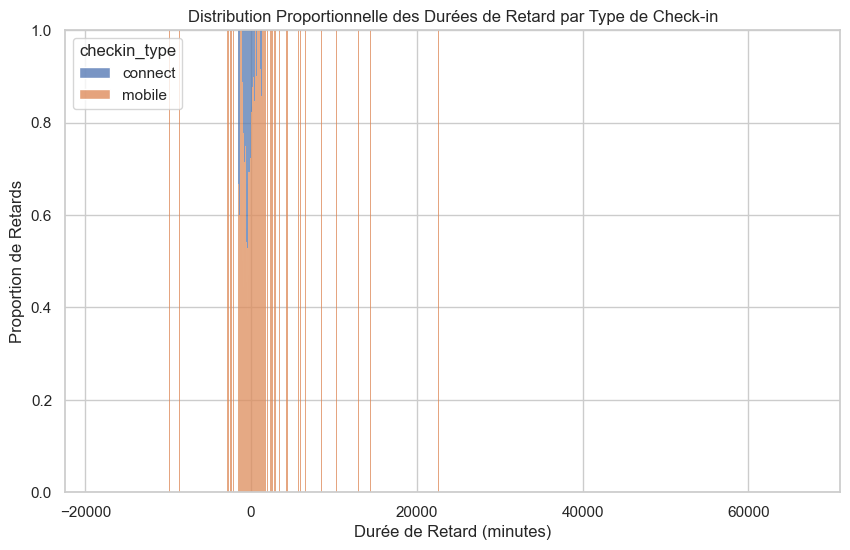

In [88]:
plt.figure(figsize=(10, 6))
sns.histplot(data=delay_data, x='delay_at_checkout_in_minutes', hue='checkin_type', multiple='fill', binwidth=30)
plt.title('Distribution Proportionnelle des Durées de Retard par Type de Check-in')
plt.xlabel('Durée de Retard (minutes)')
plt.ylabel('Proportion de Retards')
plt.show()

Diagramme à Barres des Impacts Directs
Objectif : Comparer le pourcentage de retards ayant un impact direct sur les locations suivantes entre "Connect" et "Mobile".

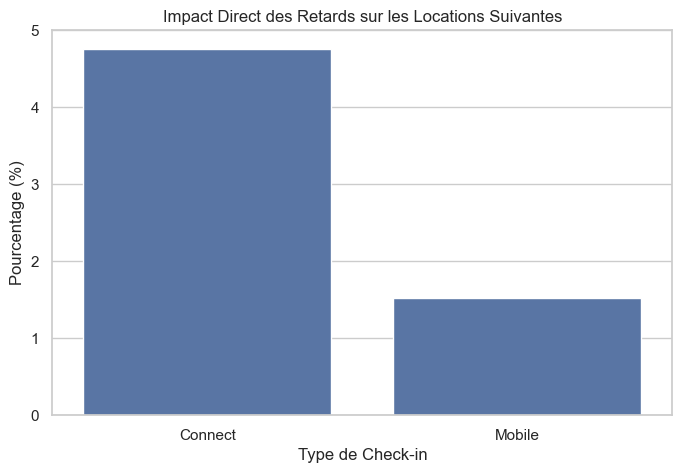

In [73]:
impact_data = {
    'Check-in Type': ['Connect', 'Mobile'],
    'Impact Direct (%)': [percentage_impact_over_180_minutes_connect, percentage_impact_over_240_minutes_mobile]
}

df_impact = pd.DataFrame(impact_data)

plt.figure(figsize=(8, 5))
sns.barplot(x='Check-in Type', y='Impact Direct (%)', data=df_impact)
plt.title('Impact Direct des Retards sur les Locations Suivantes')
plt.xlabel('Type de Check-in')
plt.ylabel('Pourcentage (%)')
plt.show()


Boxplot des Retards par Type de Check-in
Objectif : Comparer la distribution des retards entre "Connect" et "Mobile" pour identifier des différences dans la variabilité et les valeurs extrêmes.

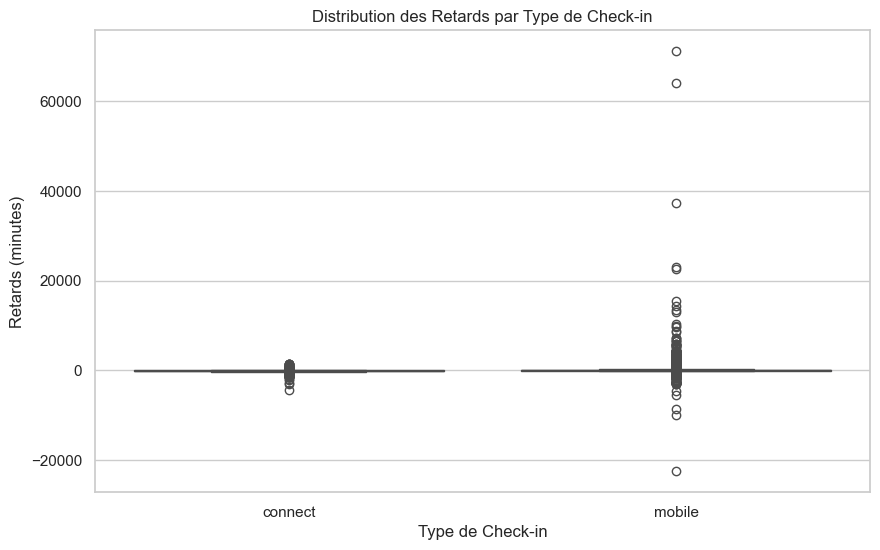

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='checkin_type', y='delay_at_checkout_in_minutes', data=delay_data)
plt.title('Distribution des Retards par Type de Check-in')
plt.xlabel('Type de Check-in')
plt.ylabel('Retards (minutes)')
plt.show()


Diagramme de Répartition des Cas Résolus
Objectif : Montrer le nombre de retards qui n'ont pas affecté directement les locations suivantes pour différents seuils.

<Figure size 1000x600 with 0 Axes>

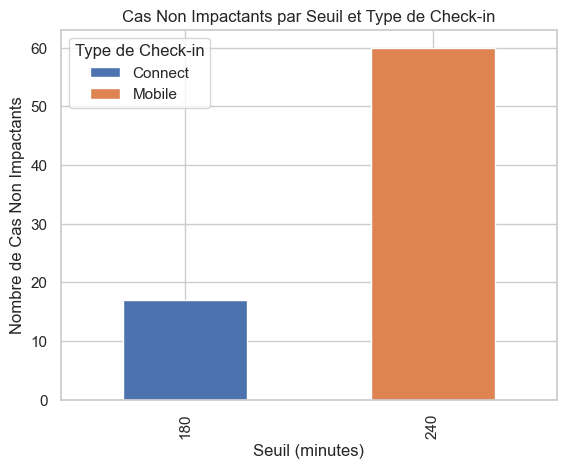

In [74]:
resolved_data = {
    'Seuil (minutes)': [180, 240],
    'Connect': [nombre_cas_non_impactants_180_connect, 0],  # 0 si pas applicable
    'Mobile': [0, nombre_cas_non_impactants_240_mobile]  # 0 si pas applicable
}

df_resolved = pd.DataFrame(resolved_data)

plt.figure(figsize=(10, 6))
df_resolved.set_index('Seuil (minutes)').plot(kind='bar', stacked=True)
plt.title('Cas Non Impactants par Seuil et Type de Check-in')
plt.xlabel('Seuil (minutes)')
plt.ylabel('Nombre de Cas Non Impactants')
plt.legend(title='Type de Check-in')
plt.show()


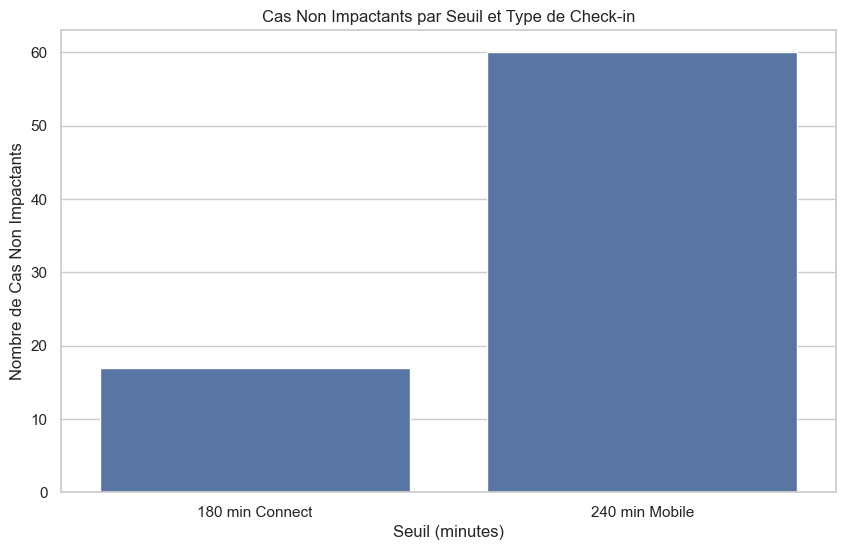

In [82]:
resolved_data = {
    'Seuil (minutes)': ['180 min Connect', '240 min Mobile'],
    'Cas Non Impactants': [nombre_cas_non_impactants_180_connect, nombre_cas_non_impactants_240_mobile]
}

df_resolved = pd.DataFrame(resolved_data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Seuil (minutes)', y='Cas Non Impactants', data=df_resolved)
plt.title('Cas Non Impactants par Seuil et Type de Check-in')
plt.xlabel('Seuil (minutes)')
plt.ylabel('Nombre de Cas Non Impactants')
plt.show()


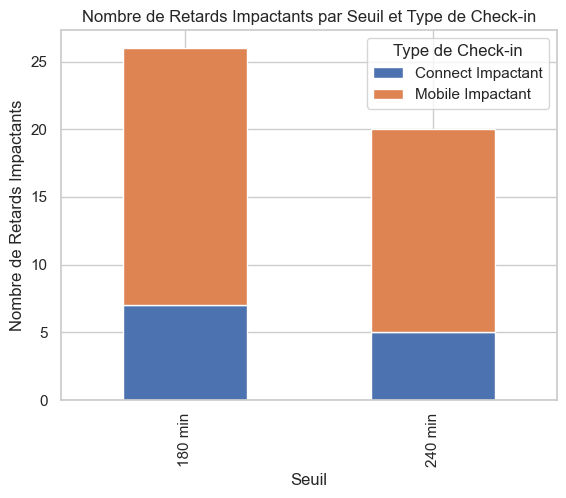

In [78]:
# Créer des données fictives pour l'exemple
data = {
    'Seuil': ['180 min', '240 min'],
    'Connect Impactant': [7, 5],  # Nombre hypothétique de retards impactants pour Connect
    'Mobile Impactant': [19, 15]  # Nombre hypothétique de retards impactants pour Mobile
}

df = pd.DataFrame(data)
df.set_index('Seuil', inplace=True)
df.plot(kind='bar', stacked=True)
plt.title('Nombre de Retards Impactants par Seuil et Type de Check-in')
plt.xlabel('Seuil')
plt.ylabel('Nombre de Retards Impactants')
plt.legend(title='Type de Check-in')
plt.show()


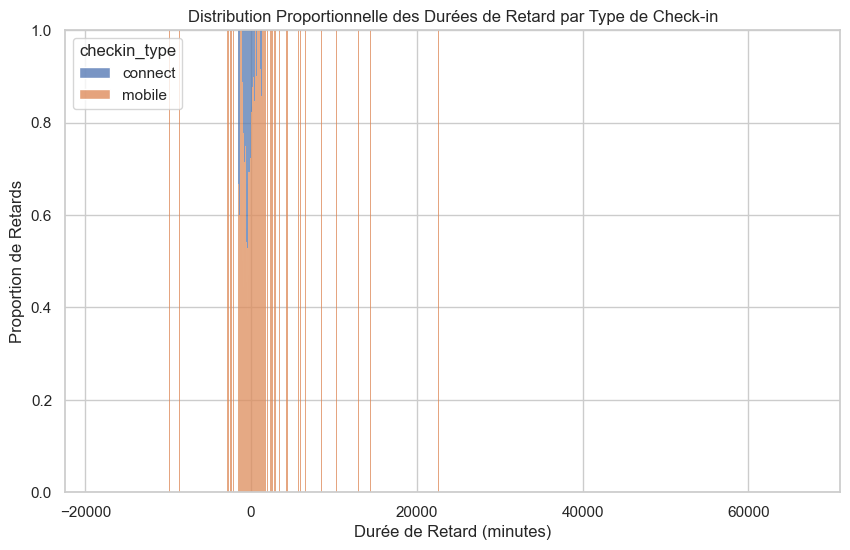

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(data=delay_data, x='delay_at_checkout_in_minutes', hue='checkin_type', multiple='fill', binwidth=30)
plt.title('Distribution Proportionnelle des Durées de Retard par Type de Check-in')
plt.xlabel('Durée de Retard (minutes)')
plt.ylabel('Proportion de Retards')
plt.show()


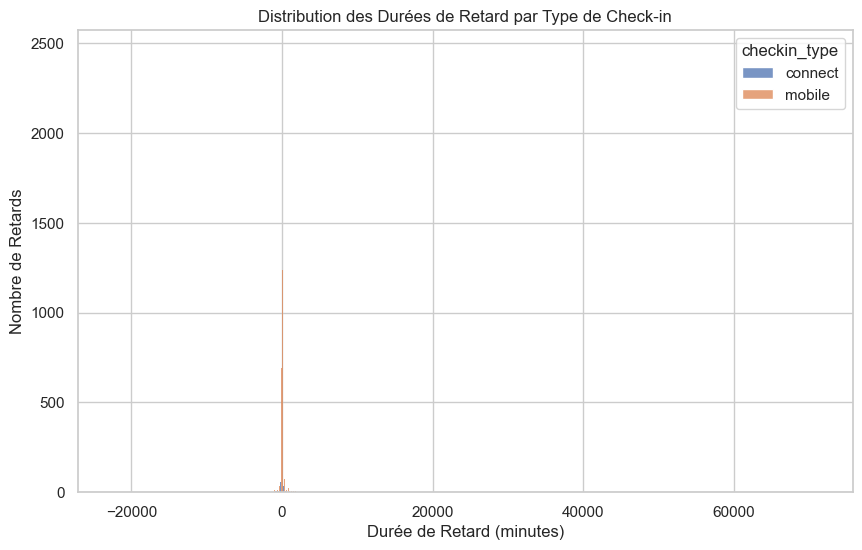

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(data=delay_data, x='delay_at_checkout_in_minutes', hue='checkin_type', multiple='dodge', binwidth=30)
plt.title('Distribution des Durées de Retard par Type de Check-in')
plt.xlabel('Durée de Retard (minutes)')
plt.ylabel('Nombre de Retards')
plt.show()


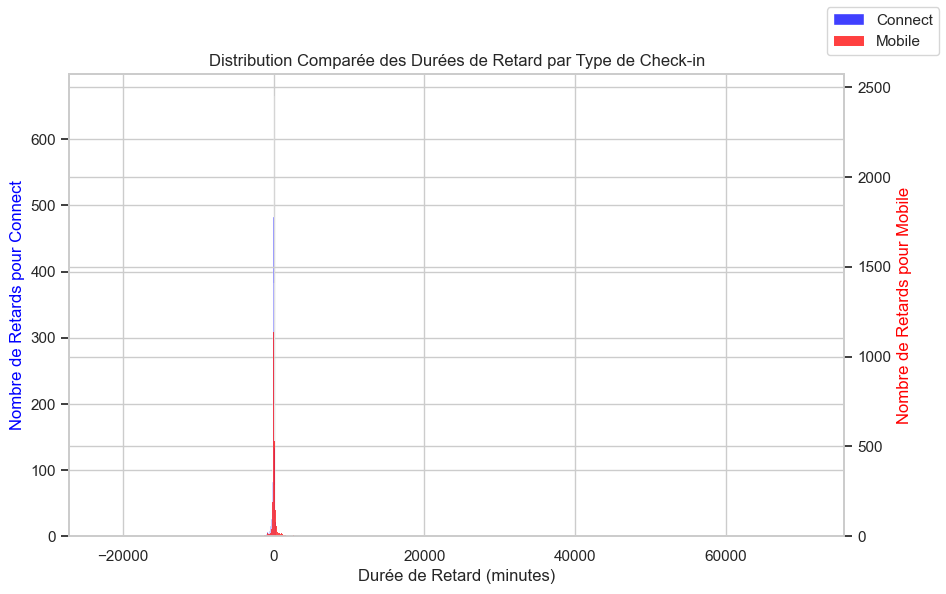

In [86]:
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.histplot(data=delay_data[delay_data['checkin_type'] == 'connect'], x='delay_at_checkout_in_minutes', color='blue', ax=ax1, binwidth=30, label='Connect')
ax2 = ax1.twinx()
sns.histplot(data=delay_data[delay_data['checkin_type'] == 'mobile'], x='delay_at_checkout_in_minutes', color='red', ax=ax2, binwidth=30, label='Mobile')

ax1.set_xlabel('Durée de Retard (minutes)')
ax1.set_ylabel('Nombre de Retards pour Connect', color='blue')
ax2.set_ylabel('Nombre de Retards pour Mobile', color='red')

fig.legend(loc='upper right')
plt.title('Distribution Comparée des Durées de Retard par Type de Check-in')
plt.show()
